### Import Statments

In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from datetime import datetime

### Notebook Presentation

In [57]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the data

In [58]:
df = pd.read_csv('property_data.csv')

### Understand the Türkiye House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 3479

    :Number of Attributes: 20 numeric/categorical predictive. The price (attribute 21) is the target.

    :Attribute Information (in order):
        1. CITY                city the property resides in
        2. DISTRICT            district the property resides in
        3. NEIGHBOURHOOD       neighbourhood the property resides in
        4. AIR CONDITIONING    dummy variable (= 1 if property has air conditioning; 0 otherwise)
        5. FURNISHED           dummy variable (= 1 if property is furnished; 0 otherwise)
        6. CAR PARK            dummy variable (= 1 if property has car park; 0 otherwise)
        7. CENTRAL HEATING     dummy variable (= 1 if property has central heating; 0 otherwise)
        8. GAS COMBI           dummy variable (= 1 if property has gas combi; 0 otherwise)
        9. UNDERFLOOR HEATING  dummy variable (= 1 if property has underfloor heating; 0 otherwise)
        10. UNDERFLOOR COOLING dummy variable (= 1 if property has underfloor cooling; 0 otherwise)
        11. REALTOR FEE         
        12. TOTAL FLOORS        total floors of the building the property is in
        13. COMPLETION DATE     completion date of the property
        14. SUBTYPE             the type of property (e.g. ground floor apartment, detatched villa, etc.)
        15. PROPERTY SIZE       size of property in m^2
        16. STOREYS             number of storeys in the property
        17. BEDROOM             number of bedrooms in the property
        18. BATHROOM            number of bathrooms in the property
        19. BALCONY             number of balconies in the property
        20. FLOOR               the floor number of the property with respect to the building it is in (if applicable)
        21. PRICE               price of the property in €1000's
        
    :Missing Attribute Values: None

# Preliminary Data Exploration

In [59]:
display(df.head())
df.tail()

,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,TOTAL FLOORS,COMPLETION DATE,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE
0,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,5.00,12 / 2025,Ground Floor,58.00,1,1,1.00,1,NaN,116.00
1,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,5.00,12 / 2025,Middle Floor,58.00,1,1,1.00,1,NaN,122.00
2,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,5.00,12 / 2025,Penthouse,116.00,2,2,2.00,2,NaN,251.00
3,Antalya,Kepez,Çankaya,1,0,0,0,0,0,0,...,6.00,1 / 2025,Middle Floor,155.00,1,3,2.00,1,NaN,713.00
4,Antalya,Kepez,Çankaya,1,0,0,0,0,0,0,...,6.00,1 / 2025,Middle Floor,170.00,1,4,2.00,2,NaN,746.00


,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,TOTAL FLOORS,COMPLETION DATE,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE
3462,İstanbul,Beylikdüzü,Kavaklı,0,0,1,0,1,0,0,...,12.00,8 / 2024,Duplex,216.00,2,4,2.00,2,NaN,513.00
3463,Ankara,Keçiören,Esertepe,0,0,1,0,1,0,0,...,18.00,7 / 2021,Middle Floor,190.00,1,4,2.00,2,NaN,244.00
3464,Yalova,Yalova Merkez,Bayraktepe,0,0,1,0,0,1,0,...,8.00,6 / 2023,Ground Floor,61.00,1,1,1.00,1,2.00,68.00
3465,Yalova,Yalova Merkez,Bayraktepe,0,0,1,0,0,1,0,...,8.00,6 / 2023,Middle Floor,40.00,1,Studio,1.00,1,2.00,88.50
3466,Yalova,Yalova Merkez,Bayraktepe,0,0,1,0,0,1,0,...,8.00,6 / 2023,Middle Floor,75.00,1,2,1.00,1,5.00,101.00


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CITY                3467 non-null   object 
 1   DISTRICT            3467 non-null   object 
 2   NEIGHBOURHOOD       3467 non-null   object 
 3   AIR CONDITIONING    3467 non-null   int64  
 4   FURNISHED           3467 non-null   int64  
 5   CAR PARK            3467 non-null   int64  
 6   CENTRAL HEATING     3467 non-null   int64  
 7   GAS COMBI           3467 non-null   int64  
 8   UNDERFLOOR HEATING  3467 non-null   int64  
 9   UNDERFLOOR COOLING  3467 non-null   int64  
 10  REALTOR FEE         3467 non-null   object 
 11  TOTAL FLOORS        2762 non-null   float64
 12  COMPLETION DATE     3461 non-null   object 
 13  SUBTYPE             3467 non-null   object 
 14  PROPERTY SIZE       3467 non-null   float64
 15  STOREYS             3461 non-null   object 
 16  BEDROO

We see that there are no null values for PRICE.

## Data Cleaning - Check for Missing Values and Duplicates

In [61]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df[df.duplicated()].head()

Number of duplicate rows: 41


,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,TOTAL FLOORS,COMPLETION DATE,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE
2516,Bursa,Nilüfer,23 Nisan,0,0,1,0,1,0,0,...,22.00,6 / 2024,Office,40.00,1,1,NaN,NaN,1.00,98.00
2580,Antalya,Döşemealtı,Yeşilbayır,1,0,0,0,1,1,0,...,3.00,12 / 2024,Ground Floor,170.00,1,4,2.00,2,NaN,597.00
2600,Yalova,Çınarcık,Cumhuriyet,1,0,1,0,0,0,0,...,4.00,9 / 2018,Duplex,90.00,2,2,2.00,1,1.00,70.00
2669,Muğla,Bodrum,Gümüşlük,1,0,1,0,0,1,0,...,NaN,12 / 2023,Detached Villa,210.00,1,4,3.00,NaN,NaN,842.00
2670,Muğla,Bodrum,Gümüşlük,1,0,1,0,0,1,0,...,NaN,12 / 2023,Detached Villa,237.00,1,5,4.00,NaN,NaN,898.00


In [62]:
df[(df["COMPLETION DATE"] == "12 / 2024") & (df["NEIGHBOURHOOD"] == "Yeşilbayır")]

,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,TOTAL FLOORS,COMPLETION DATE,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE
6,Antalya,Döşemealtı,Yeşilbayır,1,0,0,0,1,1,0,...,3.00,12 / 2024,Ground Floor,170.00,1,4,2.00,2,NaN,597.00
2580,Antalya,Döşemealtı,Yeşilbayır,1,0,0,0,1,1,0,...,3.00,12 / 2024,Ground Floor,170.00,1,4,2.00,2,NaN,597.00
2593,Antalya,Döşemealtı,Yeşilbayır,0,0,1,0,0,1,0,...,2.00,12 / 2024,Detached Villa,400.00,2,4,4.00,2,NaN,990.00


In [63]:
df_clean=df.drop_duplicates()
df_clean.shape

(3426, 21)

## Descriptive Statistics

In [64]:
df_clean.describe()

,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,TOTAL FLOORS,PROPERTY SIZE,BATHROOM,FLOOR,PRICE
count,"3,426.00","3,426.00","3,426.00","3,426.00","3,426.00","3,426.00","3,426.00","2,730.00","3,426.00","3,304.00",859.00,"3,426.00"
mean,0.71,0.07,0.68,0.06,0.29,0.33,0.02,8.30,155.63,2.07,2.81,531.94
std,0.45,0.25,0.47,0.23,0.45,0.47,0.13,7.68,110.31,1.19,3.42,953.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,36.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,82.00,1.00,1.00,156.00
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,125.00,2.00,2.00,266.00
75%,1.00,0.00,1.00,0.00,1.00,1.00,0.00,10.00,190.00,2.00,3.00,565.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,65.00,982.00,12.00,31.00,"23,310.00"


In [65]:
df_clean.BEDROOM.value_counts()

BEDROOM
2         1036
3          765
1          718
4          532
5          192
Studio      77
6           58
7           14
8           13
9            5
12           4
10           2
20           1
14           1
13           1
57           1
Name: count, dtype: int64

In [66]:
df_clean[df_clean.BEDROOM=="57"]

,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,TOTAL FLOORS,COMPLETION DATE,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE
2698,Muğla,Fethiye,Ölüdeniz,1,1,1,0,0,0,0,...,3.00,1 / 2015,Hotel,3.60,3,57,NaN,NaN,1.00,"3,265.00"


The property with 57 rooms is actually a hotel for sale.

In [67]:
print(f"Median price of home: €{df_clean.PRICE.median()*1000:.2f}")
print(f"Mean price of home: €{df_clean.PRICE.mean()*1000:.2f}")

Median price of home: €266000.00
Mean price of home: €531941.33


### Restricting analysis to one city

In [68]:
chosen_city="Antalya" # Change this variable to the desired city

In [69]:
df_clean.CITY.value_counts()

CITY
Antalya     1471
İstanbul     780
Muğla        296
Ankara       185
Mersin       181
İzmir        165
Bursa         95
Yalova        89
Kocaeli       72
Trabzon       62
Aydın         28
Sakarya        2
Name: count, dtype: int64

In [70]:
data=pd.DataFrame(df_clean[df_clean.CITY==chosen_city]) # we can set this to any city and the following analysis holds accordingly
data.shape

(1471, 21)

In our analysis we shall take a 'Studio' apartment to be 1 bedroom.

In [71]:
data.loc[data['BEDROOM'] == 'Studio', 'BEDROOM'] = '1'
data['BEDROOM'] = pd.to_numeric(data['BEDROOM'], errors='coerce')
data.BEDROOM.value_counts()

BEDROOM
2.00     552
1.00     434
3.00     245
4.00     165
5.00      53
6.00      12
8.00       3
7.00       2
9.00       1
14.00      1
Name: count, dtype: int64

In [72]:
for column in data[['REALTOR FEE', 'BALCONY', 'STOREYS']]:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())

Value counts for REALTOR FEE:
REALTOR FEE
FREE    1304
%2       164
%10        2
%4         1
Name: count, dtype: int64
Value counts for BALCONY:
BALCONY
1     757
2     484
3     107
4      40
5       7
5+      5
Name: count, dtype: int64
Value counts for STOREYS:
STOREYS
1     956
2     422
3      81
4       4
5       3
5+      2
Name: count, dtype: int64


In [73]:
def convert_completion_date(date_str):
    try:
        return datetime.strptime(date_str.strip(), '%m / %Y')
    except ValueError:
        return pd.NaT  # If conversion fails, return Not-a-Time

data['COMPLETION DATE'] = convert_completion_date(str(data['COMPLETION DATE']))

data['COMPLETION YEAR'] = data['COMPLETION DATE'].dt.year
data['COMPLETION MONTH'] = data['COMPLETION DATE'].dt.month

data = data.drop(columns=['COMPLETION DATE'])

In [74]:
data.head()

,CITY,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,...,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE,COMPLETION YEAR,COMPLETION MONTH
0,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,Ground Floor,58.00,1,1.00,1.00,1,NaN,116.00,NaN,NaN
1,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,Middle Floor,58.00,1,1.00,1.00,1,NaN,122.00,NaN,NaN
2,Antalya,Muratpaşa,Sinan,1,0,0,0,0,0,0,...,Penthouse,116.00,2,2.00,2.00,2,NaN,251.00,NaN,NaN
3,Antalya,Kepez,Çankaya,1,0,0,0,0,0,0,...,Middle Floor,155.00,1,3.00,2.00,1,NaN,713.00,NaN,NaN
4,Antalya,Kepez,Çankaya,1,0,0,0,0,0,0,...,Middle Floor,170.00,1,4.00,2.00,2,NaN,746.00,NaN,NaN


We exclude rows with values 5+ for BALCONY or STOREYS.

In [75]:
data.drop(columns=['CITY','REALTOR FEE'], inplace=True)
data['STOREYS'] = pd.to_numeric(data['STOREYS'], errors='coerce')
data['BALCONY'] = pd.to_numeric(data['BALCONY'], errors='coerce')

In [76]:
display(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1471 entries, 0 to 3453
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT            1471 non-null   object 
 1   NEIGHBOURHOOD       1471 non-null   object 
 2   AIR CONDITIONING    1471 non-null   int64  
 3   FURNISHED           1471 non-null   int64  
 4   CAR PARK            1471 non-null   int64  
 5   CENTRAL HEATING     1471 non-null   int64  
 6   GAS COMBI           1471 non-null   int64  
 7   UNDERFLOOR HEATING  1471 non-null   int64  
 8   UNDERFLOOR COOLING  1471 non-null   int64  
 9   TOTAL FLOORS        1001 non-null   float64
 10  SUBTYPE             1471 non-null   object 
 11  PROPERTY SIZE       1471 non-null   float64
 12  STOREYS             1466 non-null   float64
 13  BEDROOM             1468 non-null   float64
 14  BATHROOM            1435 non-null   float64
 15  BALCONY             1395 non-null   float64
 16  FLOOR      

None

,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,TOTAL FLOORS,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE,COMPLETION YEAR,COMPLETION MONTH
count,"1,471.00","1,471.00","1,471.00","1,471.00","1,471.00","1,471.00","1,471.00","1,001.00","1,471.00","1,466.00","1,468.00","1,435.00","1,395.00",242.00,"1,471.00",0.00,0.00
mean,0.91,0.08,0.69,0.01,0.09,0.24,0.01,5.69,131.36,1.41,2.27,1.88,1.61,2.80,339.09,NaN,NaN
std,0.28,0.27,0.46,0.11,0.28,0.43,0.11,2.89,93.54,0.63,1.24,1.06,0.79,2.69,405.70,NaN,NaN
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,41.00,NaN,NaN
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,70.00,1.00,1.00,1.00,1.00,1.00,152.00,NaN,NaN
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,107.00,1.00,2.00,2.00,1.00,2.00,226.00,NaN,NaN
75%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,155.00,2.00,3.00,2.00,2.00,4.00,364.00,NaN,NaN
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,16.00,900.00,5.00,14.00,10.00,5.00,12.00,"7,000.00",NaN,NaN


In [77]:
print(f"Min number of rooms per property: {data.BEDROOM.min()}\nMax number of rooms per dwelling: {data.BEDROOM.max()}")

Min number of rooms per property: 1.0
Max number of rooms per dwelling: 14.0


## Visualising the Features

#### House Prices

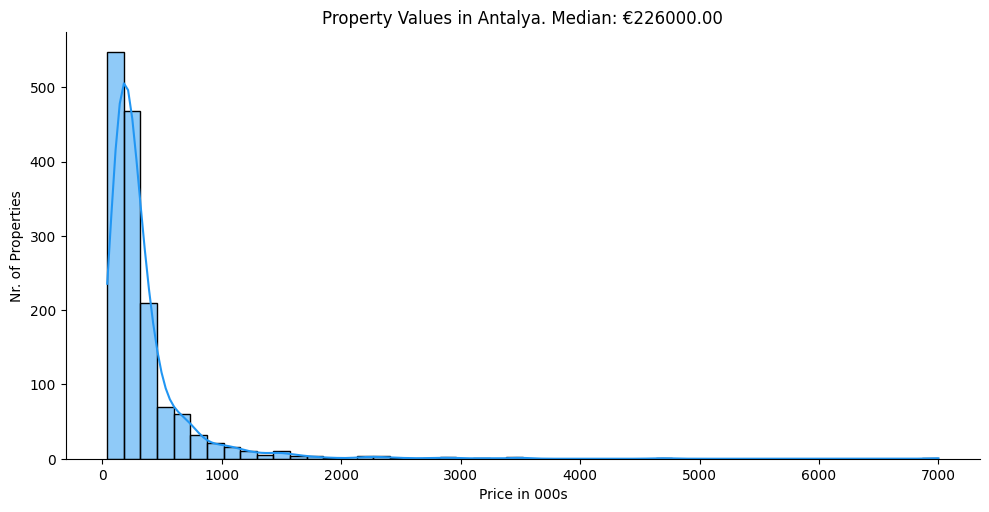

In [78]:
sns.displot(data['PRICE'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')
# We see that the distribution is quite skewed so we use the median as our form of average
plt.title(f'Property Values in {chosen_city}. Median: €{(1000*data.PRICE.median()):.2f}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Properties')

plt.show()

#### Number of Rooms

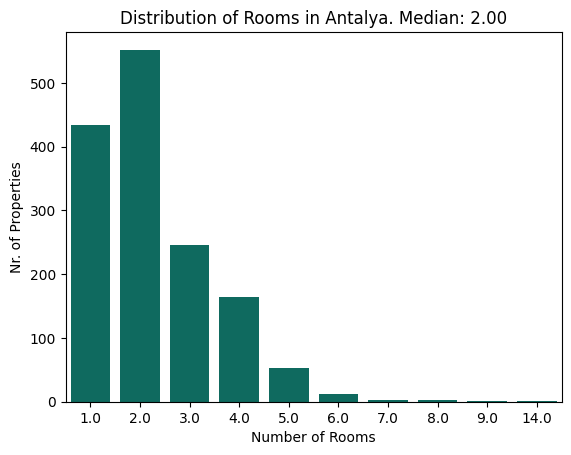

In [79]:
sns.countplot(x=data.BEDROOM, color='#00796b')

# Distribution is skewed so we consider median for our average
plt.title(f'Distribution of Rooms in {chosen_city}. Median: {data.BEDROOM.median():.2f}')
plt.xlabel('Number of Rooms')
plt.ylabel('Nr. of Properties')

plt.show()

### Property Size

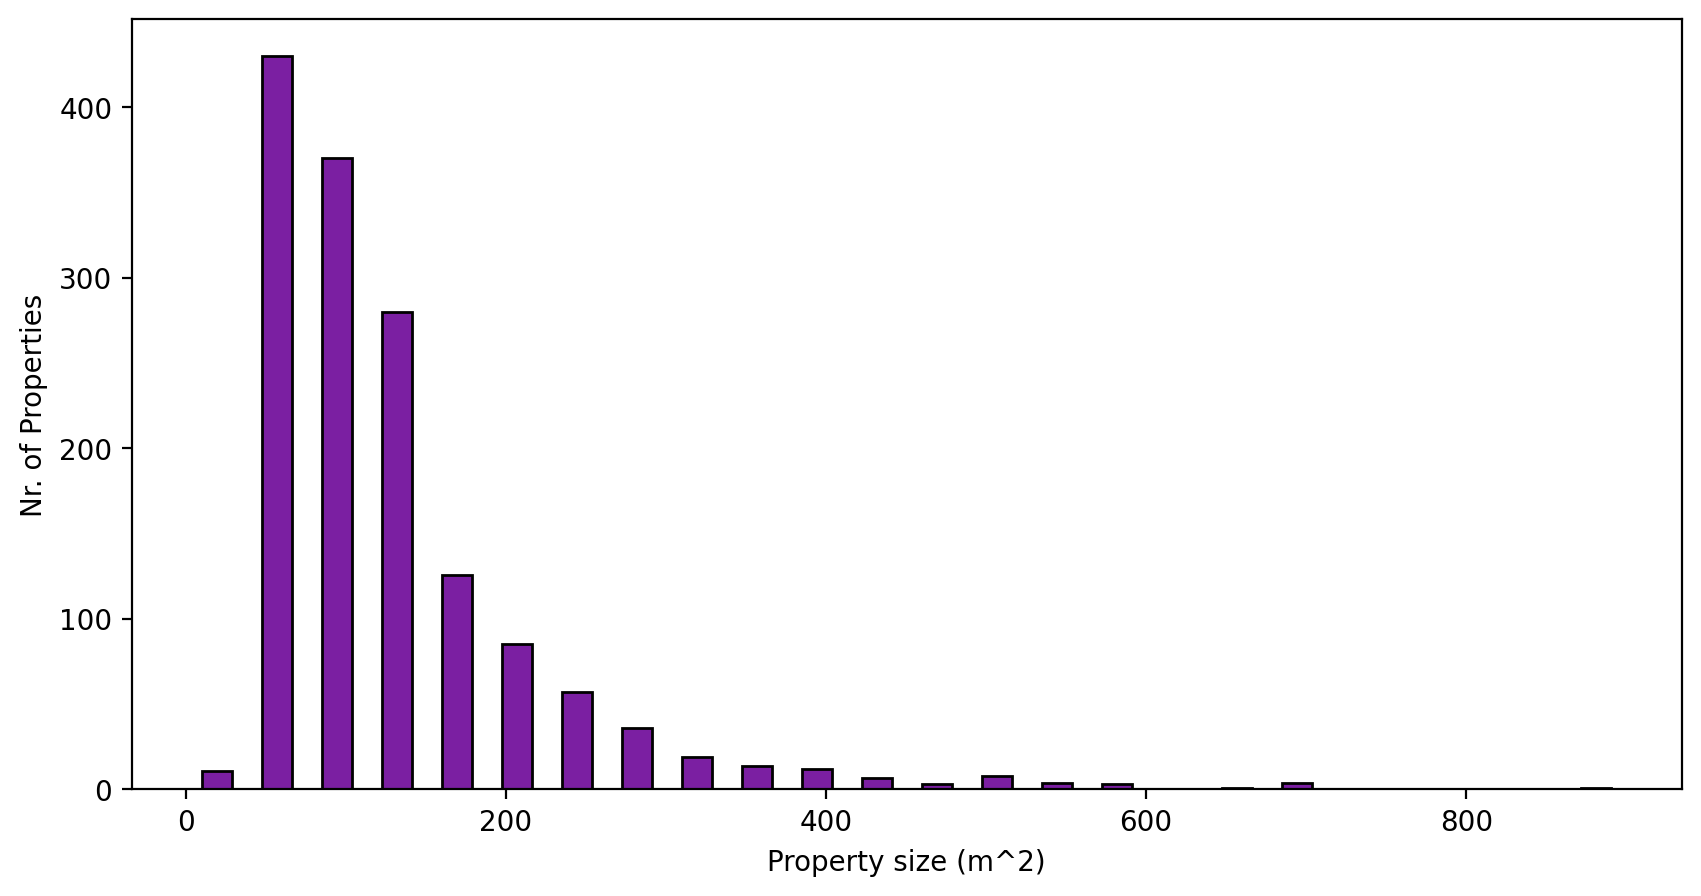

In [80]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['PROPERTY SIZE'],
         bins=24,
         ec='black',
         color='#7b1fa2',
         rwidth=0.5)

plt.xlabel('Property size (m^2)')
plt.ylabel('Nr. of Properties')
plt.show()

#### Has air conditioning?

In [81]:
aircon = data['AIR CONDITIONING'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=aircon.values,
             color=aircon.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Has Air Conditioning?')

bar.update_layout(xaxis_title='Property Has Air Conditioning?',
                  yaxis_title='Number of Properties',
                  coloraxis_showscale=False)
bar.show()

# Understand the Relationships in the Data

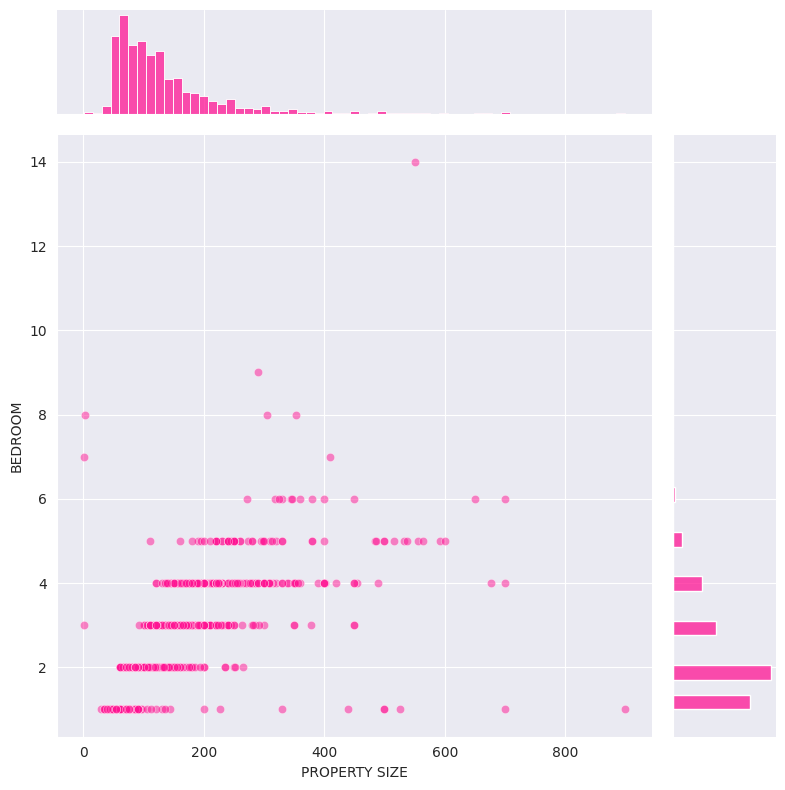

In [82]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['PROPERTY SIZE'],
                y=data['BEDROOM'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()

In [83]:
price_stats_by_district = data.groupby('DISTRICT')['PRICE'].agg(
    count='count',
    min='min',
    max='max',
    mean='mean'
).reset_index()

display(price_stats_by_district)

,DISTRICT,count,min,max,mean
0,Aksu,202,71.00,"3,200.00",287.46
1,Alanya,846,49.50,"3,500.00",319.87
2,Döşemealtı,52,70.00,"2,545.00",608.56
3,Gazipaşa,32,93.00,550.00,208.53
4,Kaş,25,184.00,"7,000.00","1,333.32"
5,Kemer,16,145.00,"1,250.00",509.38
6,Kepez,62,41.00,746.00,199.48
7,Konyaaltı,68,104.00,849.00,308.28
8,Korkuteli,1,177.00,177.00,177.00
9,Manavgat,1,"1,335.00","1,335.00","1,335.00"


<ipython-input-84-87c2e1102bf5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




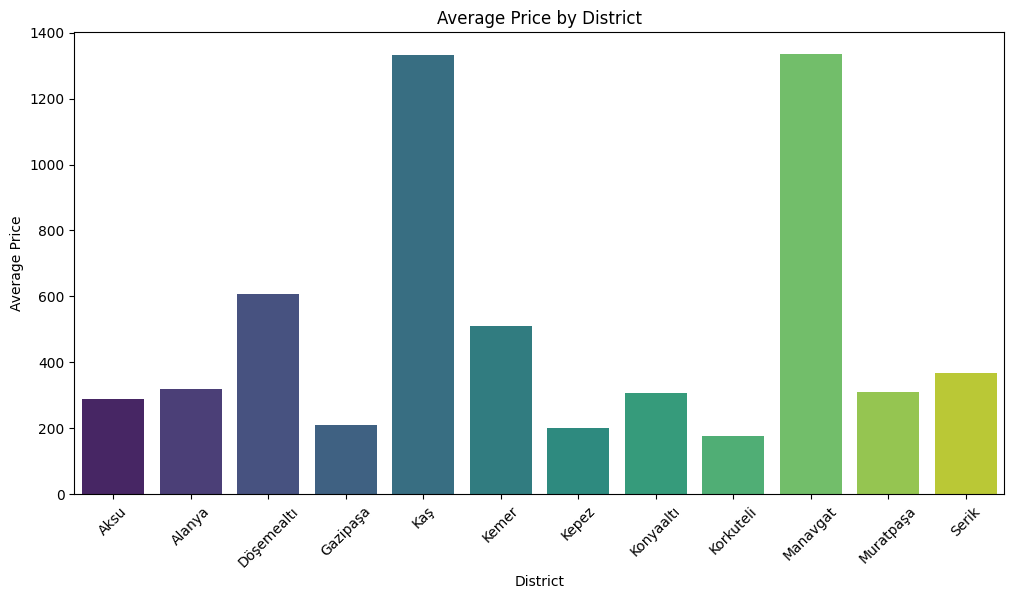

In [84]:
plt.figure(figsize=(12, 6))

sns.barplot(x='DISTRICT', y='mean', data=price_stats_by_district, palette='viridis')

plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')

plt.xticks(rotation=45)

plt.show()

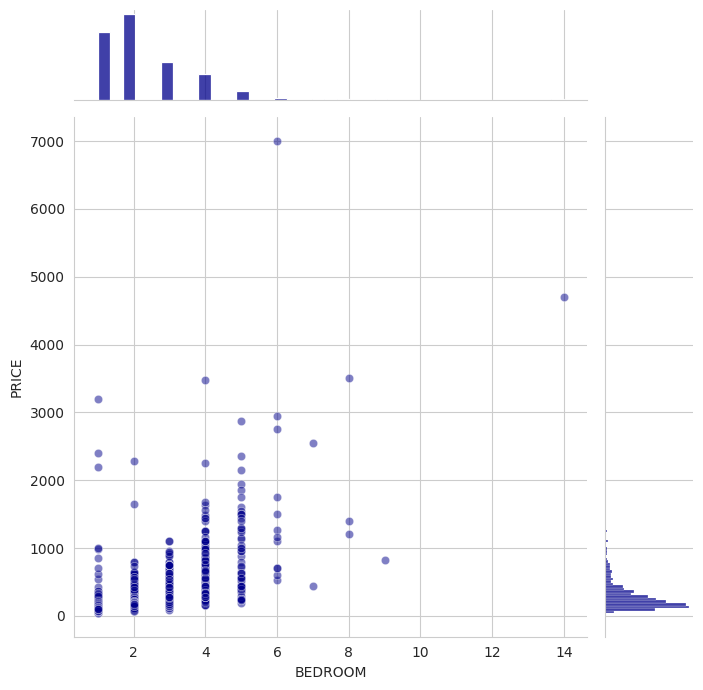

In [85]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.BEDROOM,
                y=data.PRICE,
                height=7,
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

# Split Training & Test Dataset

In [86]:
data.head(2)

,DISTRICT,NEIGHBOURHOOD,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,TOTAL FLOORS,SUBTYPE,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,PRICE,COMPLETION YEAR,COMPLETION MONTH
0,Muratpaşa,Sinan,1,0,0,0,0,0,0,5.00,Ground Floor,58.00,1.00,1.00,1.00,1.00,NaN,116.00,NaN,NaN
1,Muratpaşa,Sinan,1,0,0,0,0,0,0,5.00,Middle Floor,58.00,1.00,1.00,1.00,1.00,NaN,122.00,NaN,NaN


In [87]:
features = ['DISTRICT', 'NEIGHBOURHOOD', 'AIR CONDITIONING', 'FURNISHED',
    'CAR PARK', 'CENTRAL HEATING', 'GAS COMBI', 'UNDERFLOOR HEATING',
    'UNDERFLOOR COOLING', 'TOTAL FLOORS',
    'SUBTYPE', 'PROPERTY SIZE', 'STOREYS', 'BEDROOM', 'BATHROOM', 'BALCONY',
    'FLOOR', 'COMPLETION YEAR', 'COMPLETION MONTH'
]
target = 'PRICE'

X = data[features]
y = data[target]

In [88]:
# Identify categorical and numerical columns
categorical_cols = ['DISTRICT', 'NEIGHBOURHOOD', 'SUBTYPE']
numerical_cols = [
    'AIR CONDITIONING', 'FURNISHED', 'CAR PARK', 'CENTRAL HEATING', 'GAS COMBI',
    'UNDERFLOOR HEATING', 'UNDERFLOOR COOLING', 'TOTAL FLOORS',
    'PROPERTY SIZE', 'STOREYS', 'BEDROOM', 'BATHROOM',
    'BALCONY', 'FLOOR', 'COMPLETION YEAR', 'COMPLETION MONTH'
]

# Define preprocessing steps for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [89]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariable Regression

### Train model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['AIR CONDITIONING',
                                                   'FURNISHED', 'CAR PARK',
                                                   'CENTRAL HEATING',
                                                   'GAS COMBI',
                                                   'UNDERFLOOR HEATING',
                                                   'UNDERFLOOR COOLING',
                                                   'TOTAL FLOORS',
                                                   'PROPERTY SIZE', 'STOREYS',
                                                   'BEDROOM', 'BATHROOM',
                                                   'BALCONY', 'FLOOR',
                                                   'COMPLETION YEAR',
                                                   'COMPLETION MONTH']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['DISTRICT', 'NEIGHBOURHOOD',
                                                   'SUBTYPE'])])),
                ('regressor', LinearRegression())])

In [91]:
train_r_squared=model.score(X_train,y_train)
print(f'Training data r-squared: {train_r_squared:.2}')

Training data r-squared: 0.82


### Test model

In [92]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test data
test_r_squared = model.score(X_test, y_test)
print(f'Test Data r-squared: {model.score(X_test, y_test):.2}')

Test Data r-squared: 0.75


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 124.58
Mean Squared Error (MSE): 61530.24
Root Mean Squared Error (RMSE): 248.05


### Evaluate the Coefficients of the Model

In [94]:
final_estimator = model.named_steps['regressor']
coefficients = final_estimator.coef_

feature_names = model.named_steps['preprocessor'].get_feature_names_out()

regr_coef = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])
print(regr_coef[:20])

                          Coefficient
num__AIR CONDITIONING           33.25
num__FURNISHED                 -14.31
num__CAR PARK                   -0.97
num__CENTRAL HEATING            46.73
num__GAS COMBI                  13.12
num__UNDERFLOOR HEATING         98.50
num__UNDERFLOOR COOLING        -45.02
num__TOTAL FLOORS               10.19
num__PROPERTY SIZE               1.69
num__STOREYS                   -33.62
num__BEDROOM                    32.78
num__BATHROOM                   65.09
num__BALCONY                   -53.20
num__FLOOR                      -4.19
cat__DISTRICT_Aksu            -103.83
cat__DISTRICT_Alanya          -166.99
cat__DISTRICT_Döşemealtı      -296.24
cat__DISTRICT_Gazipaşa        -586.94
cat__DISTRICT_Kaş            1,544.89
cat__DISTRICT_Kemer             33.81


In [95]:
# Premium for having an extra room
premium = regr_coef.loc['num__BEDROOM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is €{premium:.2f}')

The price premium for having an extra room is €32781.82


### Analyse the Estimated Values & Regression Residuals

In [96]:
predicted_vals = model.predict(X_train)
residuals = (y_train - predicted_vals)

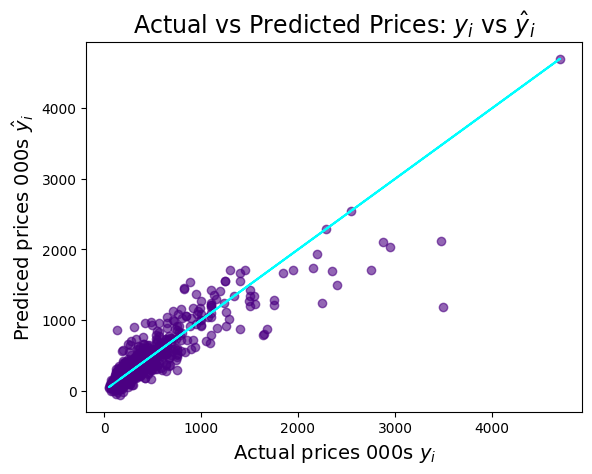

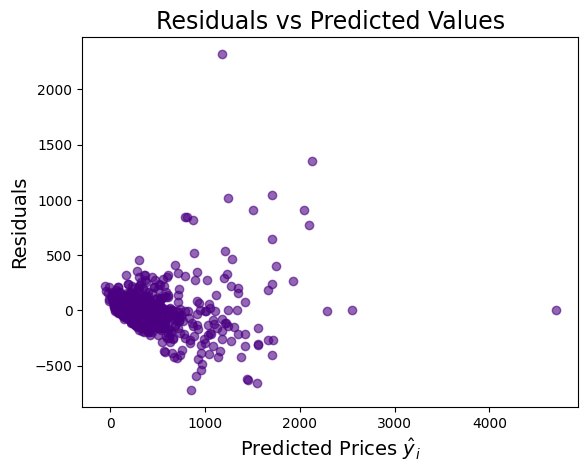

In [97]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [98]:
resid_mean = round(residuals.mean(), 2)+0
resid_skew = round(residuals.skew(), 2)
print(f"Mean: {resid_mean:.2f}\nSkew: {resid_skew:.2f}")

Mean: 0.00
Skew: 3.80


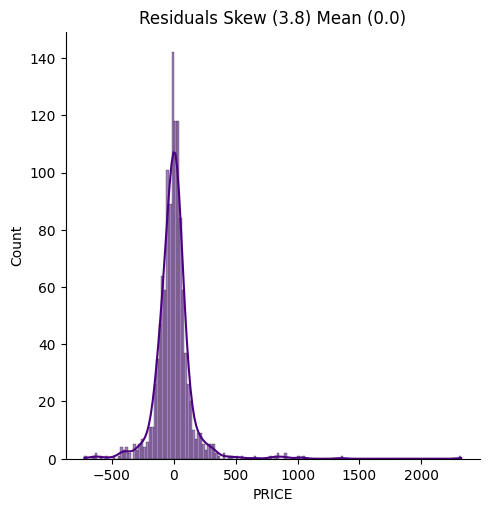

In [99]:
sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Predict a Property's Value using the Regression Coefficients

In [100]:
# Drop the target variable 'PRICE' to get the feature matrix
features = data.drop(['PRICE'], axis=1)

# Calculate average values for numerical features
average_vals_numerical = features[numerical_cols].mean().values

# Handle categorical features - using the most frequent category
average_vals_categorical = features[categorical_cols].mode().iloc[0].values

# Initialize a dictionary to hold the average values for each column
average_vals_dict = {}

# Populate the dictionary with numerical and categorical values
for col, avg_val in zip(numerical_cols, average_vals_numerical):
    average_vals_dict[col] = avg_val

for col, avg_val in zip(categorical_cols, average_vals_categorical):
    average_vals_dict[col] = avg_val

# Create a DataFrame with these average values, ensuring the column order matches the original features
property_stats = pd.DataFrame(data=[average_vals_dict])

property_stats



,AIR CONDITIONING,FURNISHED,CAR PARK,CENTRAL HEATING,GAS COMBI,UNDERFLOOR HEATING,UNDERFLOOR COOLING,TOTAL FLOORS,PROPERTY SIZE,STOREYS,BEDROOM,BATHROOM,BALCONY,FLOOR,COMPLETION YEAR,COMPLETION MONTH,DISTRICT,NEIGHBOURHOOD,SUBTYPE
0,0.91,0.08,0.69,0.01,0.09,0.24,0.01,5.69,131.36,1.41,2.27,1.88,1.61,2.80,NaN,NaN,Alanya,Altıntaş,Middle Floor


In [101]:
# Make prediction
estimate = model.predict(property_stats)[0]
euro_est = estimate * 1000
print(f'The average property is estimated to be worth €{euro_est:.7}')

The average property is estimated to be worth €235226.0


In [145]:
import random
district=random.choice(data.DISTRICT.unique()) # replace with specific district
district_neighbourhoods = df[df['DISTRICT'] == district].NEIGHBOURHOOD.unique()
neighbourhood=random.choice(district_neighbourhoods) # replace with specific neighbourhood
print(f'We consider the neighbourhood {neighbourhood} in the district {district}')
new_stats=property_stats.copy()
new_stats['BEDROOM'] = 2
new_stats['FURNISHED'] = 1
new_stats['DISTRICT'] = district
new_stats['NEIGHBOURHOOD']=neighbourhood

We consider the neighbourhood Gebizli in the district Muratpaşa


In [146]:
# Make prediction
estimate = model.predict(new_stats)[0]
euro_est = estimate * 1000
print(f'The property is estimated to be worth €{euro_est:.8}')

The property is estimated to be worth €201652.48
